In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

C:\Users\Champ\miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Champ\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Champ\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# To see distributed of data, outliers and patterns
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

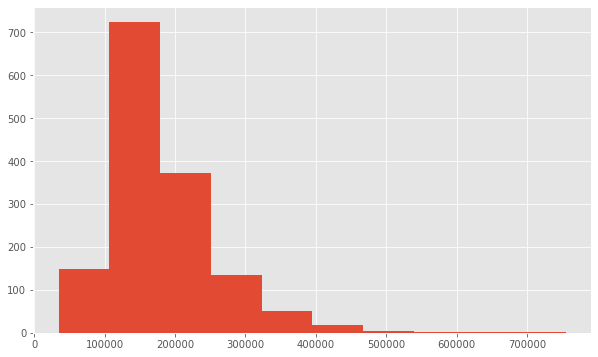

In [8]:
plt.hist(train.SalePrice);
#positively skewed

In [9]:
target=np.log(train.SalePrice)
target.skew()


0.12133506220520406

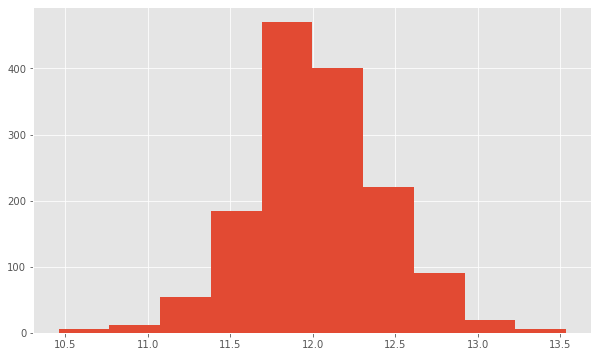

In [10]:
plt.hist(target);

In [11]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
corr['SalePrice'].sort_values(ascending=False)[:5]
# most positively coorelated

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [12]:
corr['SalePrice'].sort_values(ascending=False)[5:]
# most negatively coorelated

TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Text(0.5, 0, 'Garage Area')

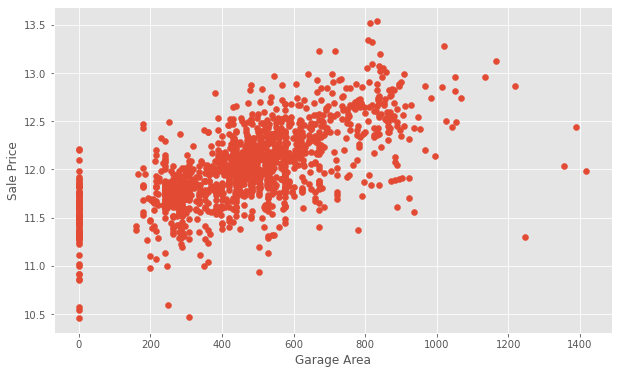

In [13]:
#Relationship GarageArea and SalePrice
plt.scatter(x=train['GarageArea'],y=target)
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")

In [14]:
#Remove some outliers
train = train[train['GarageArea']<1200]

Text(0.5, 0, 'Garage Area')

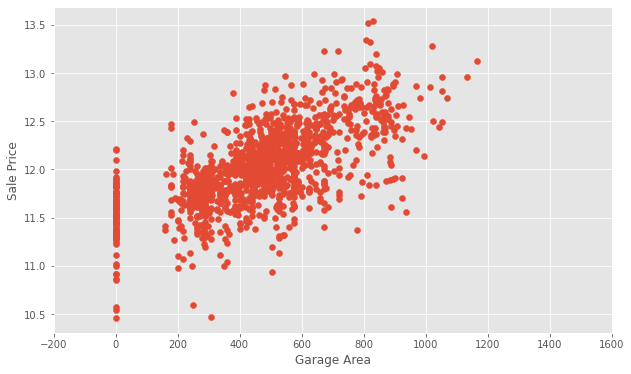

In [15]:
plt.scatter(x=train['GarageArea'],y=np.log(train.SalePrice))
plt.xlim(-200,1600) #same scale
plt.ylabel('Sale Price')
plt.xlabel("Garage Area")

In [16]:
#Handling null value
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.column = "Null Count"
nulls.index.name="Feature"
nulls

,0
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [17]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()
#top is the most occuring value shown by freq

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [18]:
print ("Original: \n")
print (train.Street.value_counts())
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)
print ('Encoded: \n')
print (train.enc_street.value_counts())  # Pave and Grvl values converted into 1 and 0

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64
Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

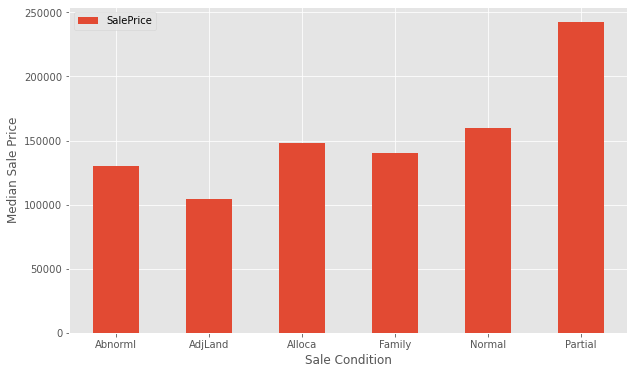

In [19]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)


In [20]:
#Partial has more significantly higher than mean encode as a new feature select all of houses that SalePrice is equal to 
#Partial to 1 otherwise 0
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

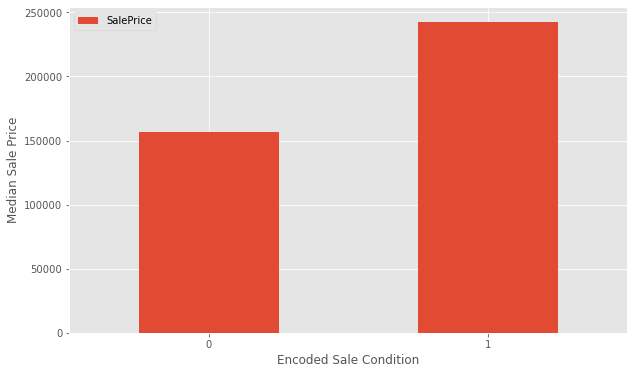

In [21]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

In [22]:
#Missing data
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
data.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_street,enc_condition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,320,0,0,700,10,2009,143000,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,0,8,2007,307000,1,0
7,8,60,63.0,10382,7,6,1973,1973,240.0,859,...,228,0,0,0,350,11,2009,200000,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,205,0,0,0,0,4,2008,129900,1,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,0,0,1,2008,118000,1,0


In [23]:
sum(data.isnull().sum() != 0)
# Check if the all of the columns have 0 null values.

0

In [24]:
# Linear model (features=x, target=y)
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
#Not include SalePrice cuz it is alredy in target variable and ID which has no relationship to SalePrice

In [25]:
# Partition the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [26]:
# Create model
lr = linear_model.LinearRegression()

# Model fitting
model = lr.fit(X_train, y_train)


In [27]:
model.score(X_test,y_test)

0.888247770926253

In [28]:
# Make predictions on the test data set
pred = model.predict(X_test)

In [29]:
print('RMSE is: \n', mean_squared_error(y_test, pred, squared=False))

RMSE is: 
 0.13357318039025629


In [30]:
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
pred = model.predict(feats)
final_pred = np.exp(pred)

submission['SalePrice'] = final_pred
submission.to_csv('submission2.csv', index=False)